# <center>  NEW YORK CITY <center>


<br>
<center><img src="https://i.imgur.com/dePGGCO.jpeg"></center>
<br>



## 1. Descargo los archivos

In [1]:
# Creamos carpeta (make directory)
!mkdir input/
# Descargar archivo listings.csv.gz -Details Listings data-
!wget http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/listings.csv.gz -P input/ \
    && gunzip input/listings.csv \
    && mv input/listings.csv input/listings_details.csv #le cambio el nombre input x por input y
# Descargar archivo reviews_details.csv gz -Details Review Data-
!wget http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/reviews.csv.gz -P input/ \
    && gunzip input/reviews.csv \
    && mv input/reviews.csv input/reviews_details.csv
# Descargar archivo calendar.csv gz -Details Calendar Data-
!wget http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/calendar.csv.gz -P input/ \
    && gunzip input/calendar.csv \
    && mv input/calendar.csv
# Descargar archivo neighbourhoods.csv -Neighbourhood list for geo filter-
!wget http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/neighbourhoods.csv -P input/ \
    && gunzip input/neighbourhoods.csv \
    && mv input/neighbourhoods.csv 
# Descargamos archivo neighbourhoods.geojson -GeoJSON file of neighbourhoods of the city-
!wget http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/neighbourhoods.geojson -P input/ \
    && gunzip input/neighbourhoods.geojson \
    && mv input/neighbourhoods.geojson 
# Descargar archivo listings.csv -	Summary information and metrics for listings in New York City-
!wget http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/listings.csv -P input/ \
    && gunzip input/listings.csv \
    && mv input/listings.csv input/listings.csv
# Descargar archivo reviews.csv -Summary Review data and Listing ID-
!wget http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/visualisations/reviews.csv -P input/ \
    && gunzip input/reviews.csv \
    && mv input/reviews.csv input/reviews.csv

--2022-10-24 15:58:34--  http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/listings.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.217.136.181
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.217.136.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24837482 (24M) [application/x-gzip]
Saving to: ‘input/listings.csv.gz’

listings.csv.gz     100%[===================>]  23.69M  43.4MB/s    in 0.5s    

2022-10-24 15:58:34 (43.4 MB/s) - ‘input/listings.csv.gz’ saved [24837482/24837482]

--2022-10-24 15:58:35--  http://data.insideairbnb.com/united-states/ny/new-york-city/2022-09-07/data/reviews.csv.gz
Resolving data.insideairbnb.com (data.insideairbnb.com)... 52.217.136.181
Connecting to data.insideairbnb.com (data.insideairbnb.com)|52.217.136.181|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 125574844 (120M) [application/x-gzip]
Saving to: ‘input/reviews.csv.gz’

reviews.csv.

## 2. Importo librerias necesarias

In [2]:
!pip install geopandas

!pip install chart_studio

!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.3 MB/s 
     |████████████████████████████████| 6.3 MB 24.1 MB/s 
     |████████████████████████████████| 16.7 MB 48.1 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.9 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=50899637832ab1e6a55c9517050f3c0eeaad4393cc0572d4aac60436f2a50b17
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

import os
import json
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd
from branca.colormap import LinearColormap

#to make the plotly graphs
import plotly.graph_objs as go
import chart_studio.plotly as py
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

#text mining
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from wordcloud import WordCloud

## 3. Dataset: Creación, edición y limpieza

Leo los datasets y los ordeno para trabajar sobre ellos

In [4]:
print(os.listdir("input"))

['neighbourhoods.geojson', 'listings.csv', 'neighbourhoods.csv', 'listings_details.csv', 'calendar.csv', 'reviews_details.csv', 'reviews.csv']


In [5]:
listings = pd.read_csv("input/listings.csv")
listings_details = pd.read_csv("input/listings_details.csv", low_memory=False)
reviews_details = pd.read_csv("input/reviews_details.csv", parse_dates=['date'])


In [6]:
calendar = pd.read_csv("input/calendar.csv", parse_dates=['date'])

In [7]:
reviews = pd.read_csv("input/reviews.csv")
neigh = pd.read_csv("input/neighbourhoods.csv")


In [ ]:
#pongo id como una columna mas si es un index
#listings.reset_index(level=None, drop=False, inplace= True, col_level=0)

In [ ]:
#cambio de nombre id por listings_id

In [8]:
listings.rename(columns={"id": "listing_id"}, inplace=True)

In [9]:
listings.set_index("listing_id", inplace=True)

In [10]:
listings_details.rename(columns={"id": "listing_id"}, inplace=True)

In [11]:
listings_details.set_index("listing_id", inplace=True)

In [12]:
calendar.set_index("listing_id", inplace=True)

Creo una lista con las columnas objetivo de listings_detail que seran utiles para el análisis



In [13]:
target_columns = ["listing_url", "host_is_superhost", "host_about", "host_response_time", "host_response_rate", "property_type", "accommodates", "maximum_nights", "first_review","review_scores_value", "review_scores_cleanliness",
        "review_scores_location", "review_scores_accuracy", "review_scores_communication", "review_scores_checkin", "review_scores_rating", "neighbourhood_cleansed", "neighbourhood_group_cleansed"]

In [14]:
listings = pd.merge(listings, listings_details[target_columns], on='listing_id', how='left')
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39881 entries, 77765 to 48971505
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   name                            39868 non-null  object 
 1   host_id                         39881 non-null  int64  
 2   host_name                       39831 non-null  object 
 3   neighbourhood_group             39881 non-null  object 
 4   neighbourhood                   39881 non-null  object 
 5   latitude                        39881 non-null  float64
 6   longitude                       39881 non-null  float64
 7   room_type                       39881 non-null  object 
 8   price                           39881 non-null  int64  
 9   minimum_nights                  39881 non-null  int64  
 10  number_of_reviews               39881 non-null  int64  
 11  last_review                     31519 non-null  object 
 12  reviews_per_month        

La columna "host response rate" es un objeto y tiene %. Lo paso a dato numérico y le quito el %

In [15]:
listings['host_response_rate'] = pd.to_numeric(listings['host_response_rate'].str.strip('%'))

In [16]:
listings["host_response_rate"].dtype

dtype('float64')

In [17]:
listings.head(2)

name  host_id            host_name  \
listing_id                                                                     
77765                     Superior @ Box House   417504  The Box House Hotel   
2539        Clean & quiet apt home by the park     2787                 John   

           neighbourhood_group neighbourhood  latitude  longitude  \
listing_id                                                          
77765                 Brooklyn    Greenpoint  40.73777  -73.95366   
2539                  Brooklyn    Kensington  40.64529  -73.97238   

               room_type  price  minimum_nights  ...  first_review  \
listing_id                                       ...                 
77765         Hotel room    308               2  ...    2011-03-26   
2539        Private room    299              30  ...    2015-12-04   

           review_scores_value  review_scores_cleanliness  \
listing_id                                                  
77765                     4.78                       4.95   
2539                      4.88                       5.00   

            review_scores_location  review_scores_accuracy  \
listing_id                                                   
77765                         4.46                    4.98   
2539                          4.75                    4.88   

            review_scores_communication review_scores_checkin  \
listing_id                                                      
77765                              4.88                  4.98   
2539                               5.00                  5.00   

           review_scores_rating neighbourhood_cleansed  \
listing_id                                               
77765                      4.90             Greenpoint   
2539                       4.89             Kensington   

           neighbourhood_group_cleansed  
listing_id                               
77765                          Brooklyn  
2539                           Brooklyn  

[2 rows x 35 columns]

Verificación de datos vacíos

In [18]:
listings.isnull().sum()

name                                 13
host_id                               0
host_name                            50
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                        8362
reviews_per_month                  8362
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           39876
listing_url                           0
host_is_superhost                    29
host_about                        17372
host_response_time                13548
host_response_rate                13548
property_type                         0
accommodates                          0
maximum_nights                        0


Limpieza de columna "license" con solo 5 datos no nulos:

In [19]:
listings = listings.drop(columns = ["license"])

## 4. Dataset: Análisis de los datos

1. CANTIDAD DE LISTADOS POR GRUPO DE VECINDARIOS

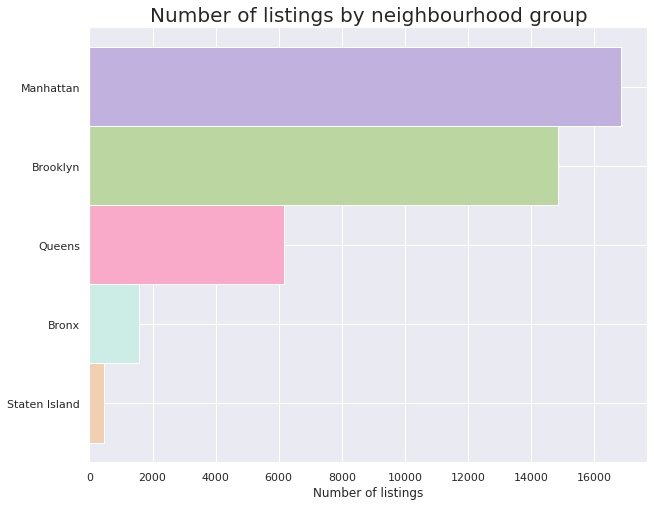

In [20]:
vecindario =listings["neighbourhood_group"].value_counts().sort_values(ascending=True)
vecindario.plot.barh(figsize=(10, 8), color = ("#f0d0b1","#ccece6","#f9aac9","#bcd6a2","#c1b1de"), width=1)
plt.title("Number of listings by neighbourhood group", fontsize=20)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

ZOOM EN MANHATTAN

In [21]:
dfM = listings[listings["neighbourhood_group"] == "Manhattan"]


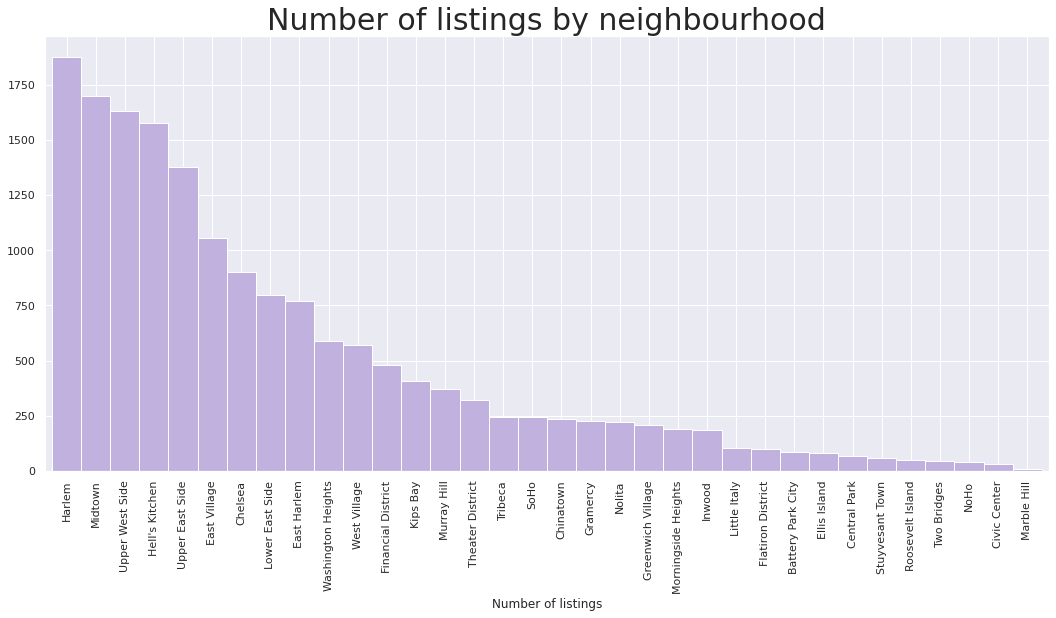

In [22]:
zoomM=dfM['neighbourhood'].value_counts().sort_values(ascending=False)
zoomM.plot.bar(figsize=(18, 8), color="#c1b1de", width=1) #bar o barh es la orientacion. horizontal o vertical
plt.title("Number of listings by neighbourhood", fontsize=30)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

ZOOM EN BROOKLYN

In [23]:
dfB = listings[listings["neighbourhood_group"] == "Brooklyn"]

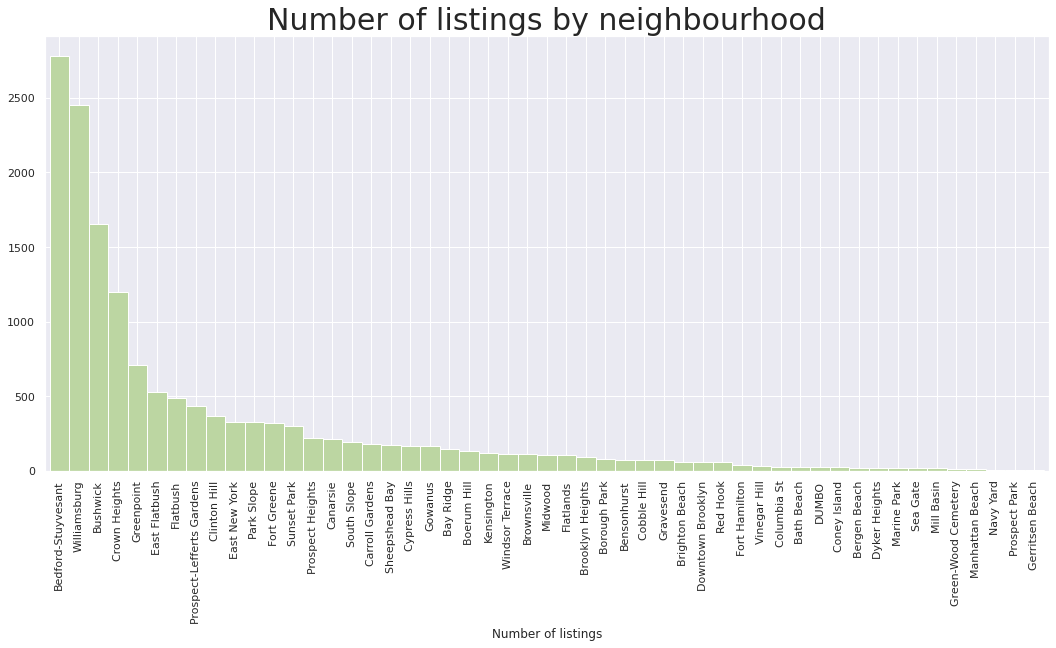

In [24]:
zoomB=dfB['neighbourhood'].value_counts().sort_values(ascending=False) #.head(15)
zoomB.plot.bar(figsize=(18, 8), color="#bcd6a2", width=1) #bar o barh es la orientacion. horizontal o vertical
plt.title("Number of listings by neighbourhood", fontsize=30)
plt.xlabel('Number of listings', fontsize=12)
plt.show()

MAPA DE LOS LISTADOS

In [25]:
lats = listings['latitude'].tolist()
lons = listings['longitude'].tolist()
locations = list(zip(lats, lons))

map1 = folium.Map(location=[40.730610, -73.935242], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

2. TIPO DE PROPIEDADES Y HABITACIONES

**Tipo de propiedades**





In [26]:
listings.property_type.unique()

array(['Room in boutique hotel', 'Private room in rental unit',
       'Entire townhouse', 'Private room in bed and breakfast',
       'Private room in home', 'Entire rental unit',
       'Private room in townhouse', 'Entire guesthouse',
       'Private room in condo', 'Entire loft', 'Private room in loft',
       'Entire guest suite', 'Private room in guest suite',
       'Entire condo', 'Entire serviced apartment', 'Entire home',
       'Shared room in loft', 'Shared room in rental unit',
       'Private room in houseboat', 'Shared room in home', 'Private room',
       'Entire place', 'Private room in guesthouse', 'Boat',
       'Room in aparthotel', 'Room in serviced apartment',
       'Private room in religious building', 'Entire cottage',
       'Private room in serviced apartment', 'Cave', 'Tiny home',
       'Entire bungalow', 'Shared room in condo', 'Floor',
       'Private room in hostel', 'Private room in casa particular',
       'Room in hotel', 'Shared room in townhouse', '

Muchos de esos tipos de propiedades tienen pocos listados en NY. A continuación, solo mostramos tipos de propiedades con al menos 100 listados. Como podemos ver, la gran mayoría de las propiedades en NY son apartamentos.

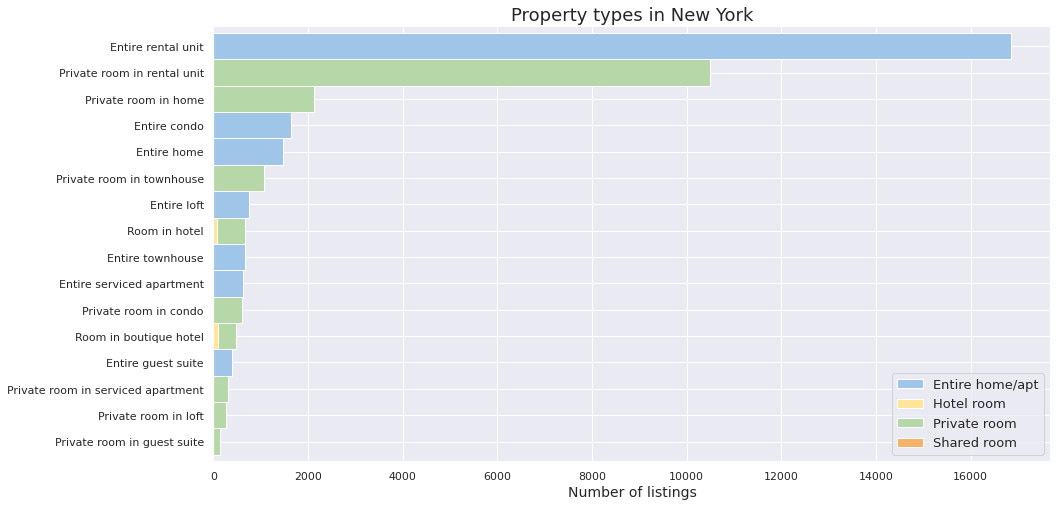

In [27]:
prop = listings.groupby(['property_type','room_type']).room_type.count()
prop = prop.unstack()
prop['total'] = prop.iloc[:,0:3].sum(axis = 1)
prop = prop.sort_values(by=['total'])
prop = prop[prop['total']>=100]
prop = prop.drop(columns=['total'])

prop.plot(kind='barh',stacked=True, color = ["#9fc5e8","#ffe599","#b6d7a8","#f6b26b"],
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Property types in New York', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

**Tipo de habitaciones**

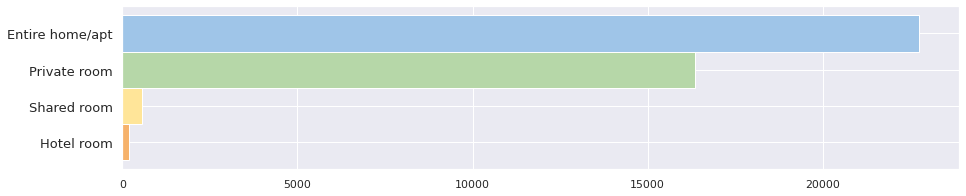

In [28]:
hab = listings['room_type']. value_counts().sort_values(ascending=True)
hab.plot.barh(figsize=(15, 3), width=1, color = ["#f6b26b","#ffe599","#b6d7a8","#9fc5e8"])
plt.show()

3. NUMERO DE ALOJADOS

Algunos tipos de anuncios están exentos y no se compartirán los datos de su anuncio con el Ayuntamiento. Los tipos de alojamiento exentos pueden incluir:

*   Anuncios de clase B, como hoteles con licencia
*   Anfitriones que alquilan 4 noches o menos por trimestre
*   Habitaciones privadas que tienen capacidad para 2 o menos huéspedes
*   Habitaciones compartidas con capacidad para 2 huéspedes o menos





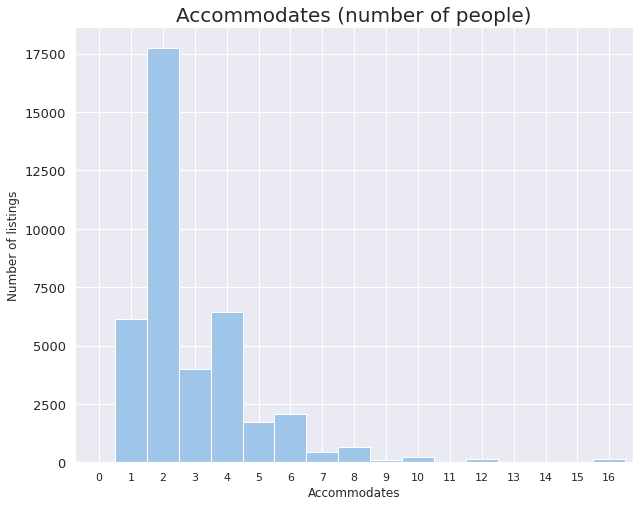

In [29]:
alojados =listings['accommodates'].value_counts().sort_index()
alojados.plot.bar(figsize=(10, 8), color="#9fc5e8", width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

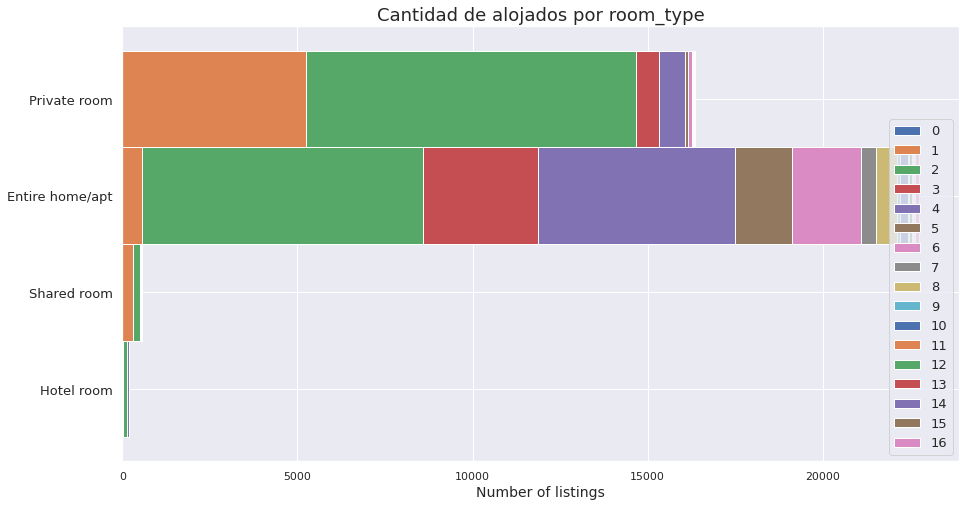

In [30]:
propaloj = listings.groupby(['room_type','accommodates']).accommodates.count().sort_values(ascending=False)
propaloj = propaloj.unstack()
propaloj['total'] = propaloj.iloc[:,0:3].sum(axis = 1)
propaloj = propaloj.sort_values(by=['total'])
propaloj = propaloj[propaloj['total']>=100]
propaloj = propaloj.drop(columns=['total'])

propaloj.plot(kind='barh',stacked=True, 
              linewidth = 1, grid=True, figsize=(15,8), width=1)
plt.title('Cantidad de alojados por room_type', fontsize=18)
plt.xlabel('Number of listings', fontsize=14)
plt.ylabel("")
plt.legend(loc = 4,prop = {"size" : 13})
plt.rc('ytick', labelsize=13)
plt.show()

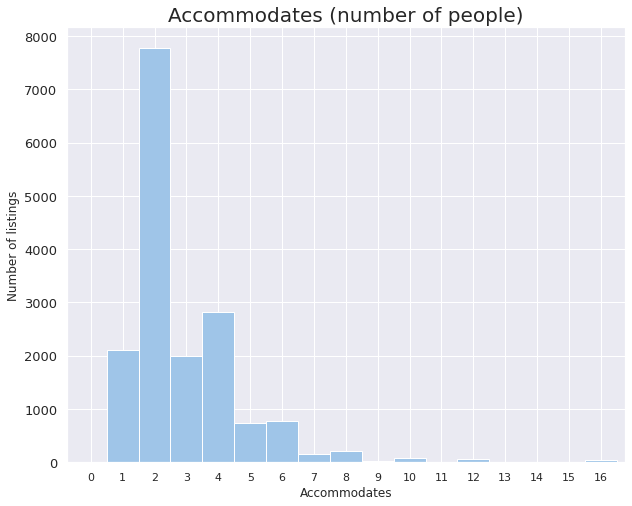

In [31]:
alojadosM =dfM['accommodates'].value_counts().sort_index()
alojadosM.plot.bar(figsize=(10, 8), color="#9fc5e8", width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

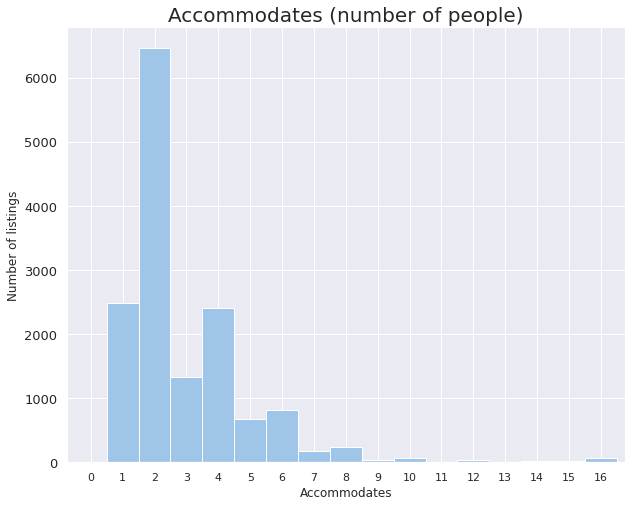

In [32]:
alojadosB =dfB['accommodates'].value_counts().sort_index()
alojadosB.plot.bar(figsize=(10, 8), color="#9fc5e8", width=1, rot=0)
plt.title("Accommodates (number of people)", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.xlabel('Accommodates', fontsize=12)
plt.show()

4. PRECIO MEDIO POR VECINDARIO

Para comparar, solo seleccionaremos el tipo de alojamiento más común, que es el alojamiento para 2 personas

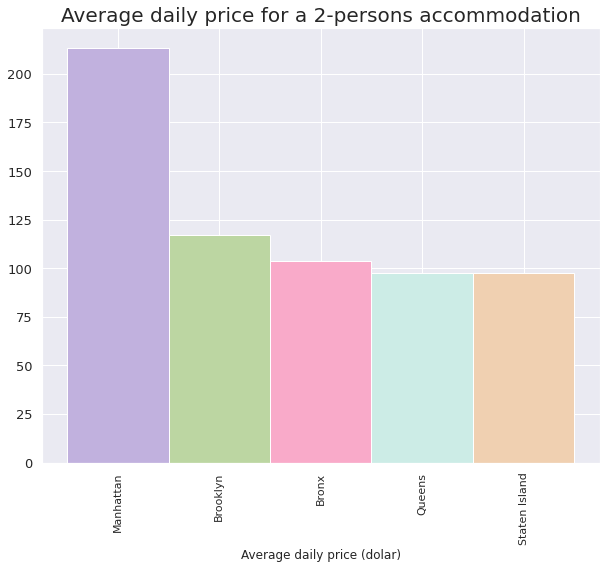

In [33]:
feq = listings[listings['accommodates']==2]
feq = feq.groupby('neighbourhood_group')['price'].mean().sort_values(ascending=False)
feq.plot.bar(figsize=(10, 8), color = ("#c1b1de", "#bcd6a2","#f9aac9","#ccece6", "#f0d0b1"), width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (dolar)', fontsize=12)
plt.ylabel("")
plt.show()

uso mediana en vez de media ya que hay outliers. Con media en primer lugar sale un vecindario de queens que no es representativo

In [34]:
# prueba0 = listings[listings['accommodates']==2]
# prueba0 = prueba0.groupby('neighbourhood')['price'].mean().sort_values(ascending=False)

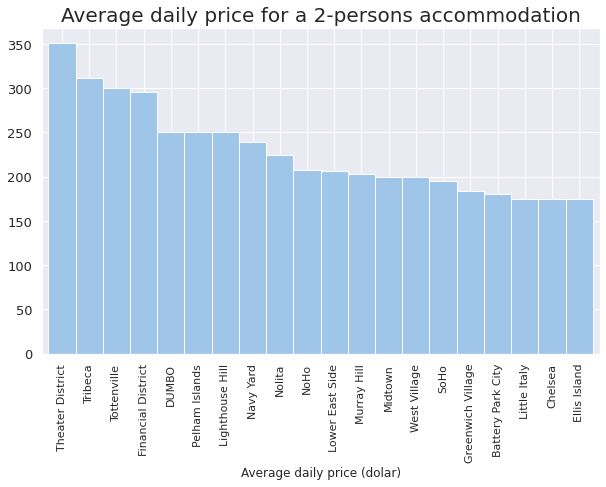

In [36]:
prueba = listings[listings['accommodates']==2]
prueba = prueba.groupby('neighbourhood')['price'].median().sort_values(ascending=False).head(20)
prueba.plot.bar(figsize=(10, 6), color = "#9fc5e8", width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (dolar)', fontsize=12)
plt.ylabel("")
plt.show()

ZOOM MANHATTAN

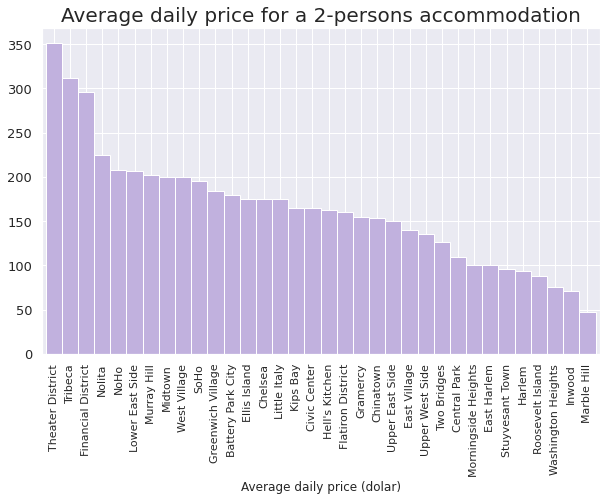

In [37]:
feqM = dfM[dfM['accommodates']==2]
feqM = feqM.groupby('neighbourhood')['price'].median().sort_values(ascending=False)
feqM.plot.bar(figsize=(10, 6), color='#c1b1de', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (dolar)', fontsize=12)
plt.ylabel("")
plt.show()

ZOOM BROOKLYN

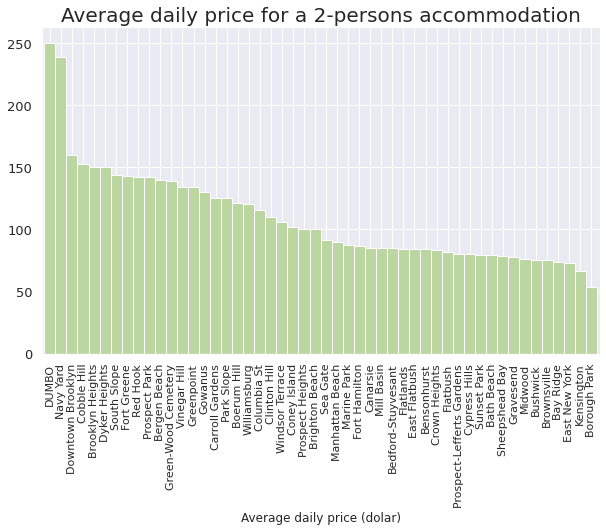

In [38]:
feqB = dfB[dfB['accommodates']==2]
feqB = feqB.groupby('neighbourhood')['price'].median().sort_values(ascending=False)
feqB.plot.bar(figsize=(10, 6), color='#bcd6a2', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (dolar)', fontsize=12)
plt.ylabel("")
plt.show()

## 5. Mapas 

A continuación muestro los barrios en un mapa y muestra el promedio por grupo de vecindario

## 5.1 Mapa por grupo de vecindario

In [39]:
adam = gpd.read_file("input/neighbourhoods.geojson")
feq = pd.DataFrame([feq])
feq = feq.transpose()
adam = pd.merge(adam, feq, on='neighbourhood_group', how='left')
adam.rename(columns={'price': 'average_price'}, inplace=True)
adam.average_price = adam.average_price.round(decimals=0)

#Conseguimos colores para nuestro mapa
map_dict = adam.set_index('neighbourhood_group')['average_price'].to_dict()
color_scale = LinearColormap(['yellow','red'], vmin = min(map_dict.values()), vmax = max(map_dict.values()))

def get_color(feature):
    value = map_dict.get(feature['properties']['neighbourhood_group'])
    return color_scale(value)


In [40]:
#Hacemos el mapa
map3 = folium.Map(location=[40.730610, -73.935242], zoom_start=11)
folium.GeoJson(data=adam,
               name='New York',
               tooltip=folium.features.GeoJsonTooltip(fields=['neighbourhood_group', 'average_price'],
                                                      labels=True,
                                                      sticky=False),
               style_function= lambda feature: {
                   'fillColor': get_color(feature),
                   'color': 'black',
                   'weight': 1,
                   'dashArray': '5, 5',
                   'fillOpacity':0.5
                   },
               highlight_function=lambda feature: {'weight':3, 'fillColor': get_color(feature), 'fillOpacity': 0.8}).add_to(map3)
map3

## 5.2 Mapa de seguridad del vecindario

Fuente: New York Crime Rates and Statistics - NeighborhoodScout 




<center><img src="https://i.imgur.com/cDDaib3.jpg" style="width: 800px;"/></center>

<center><img src="https://i.imgur.com/yBMPy7g.jpg" style="width: 800px;"/></center>

## 6. Puntuacion según reseñas 

En esta sección, agrupamos los puntajes de revisión de la ubicación por vecindario (solo listados con al menos 10 revisiones).

Puntuación según ubicación y precio diario de los alojados =2

MANHATTAN

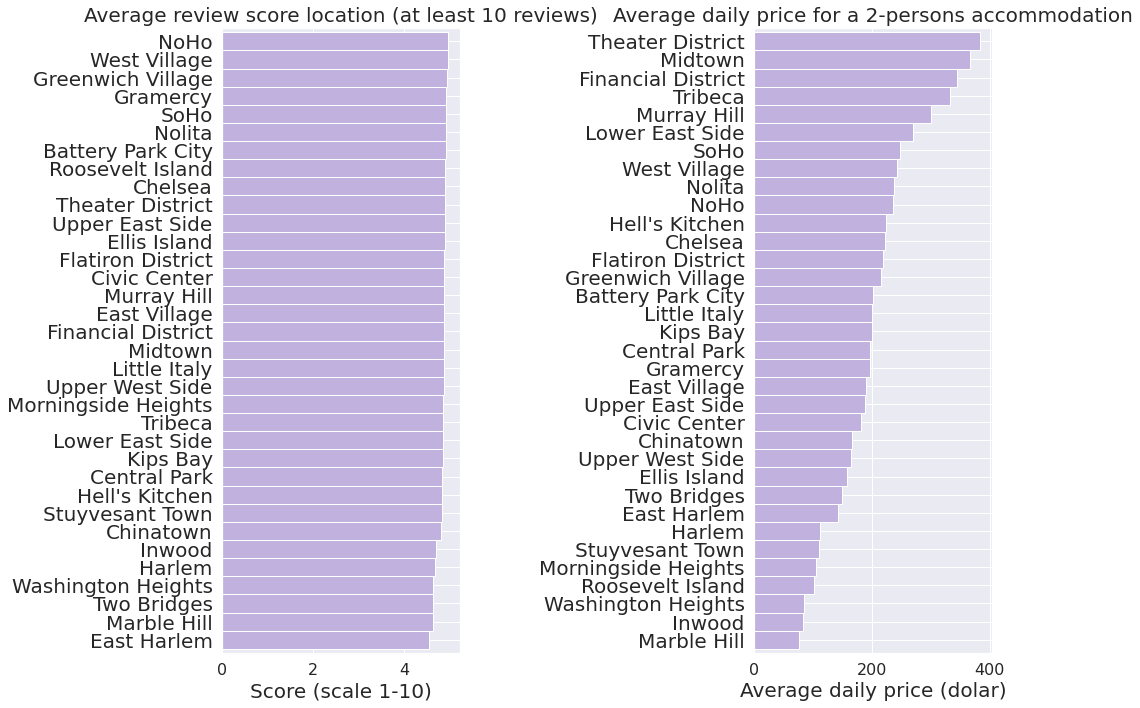

In [41]:
fig = plt.figure(figsize=(15,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = dfM[dfM['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='#c1b1de', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = dfM[dfM['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='#c1b1de', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (dolar)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

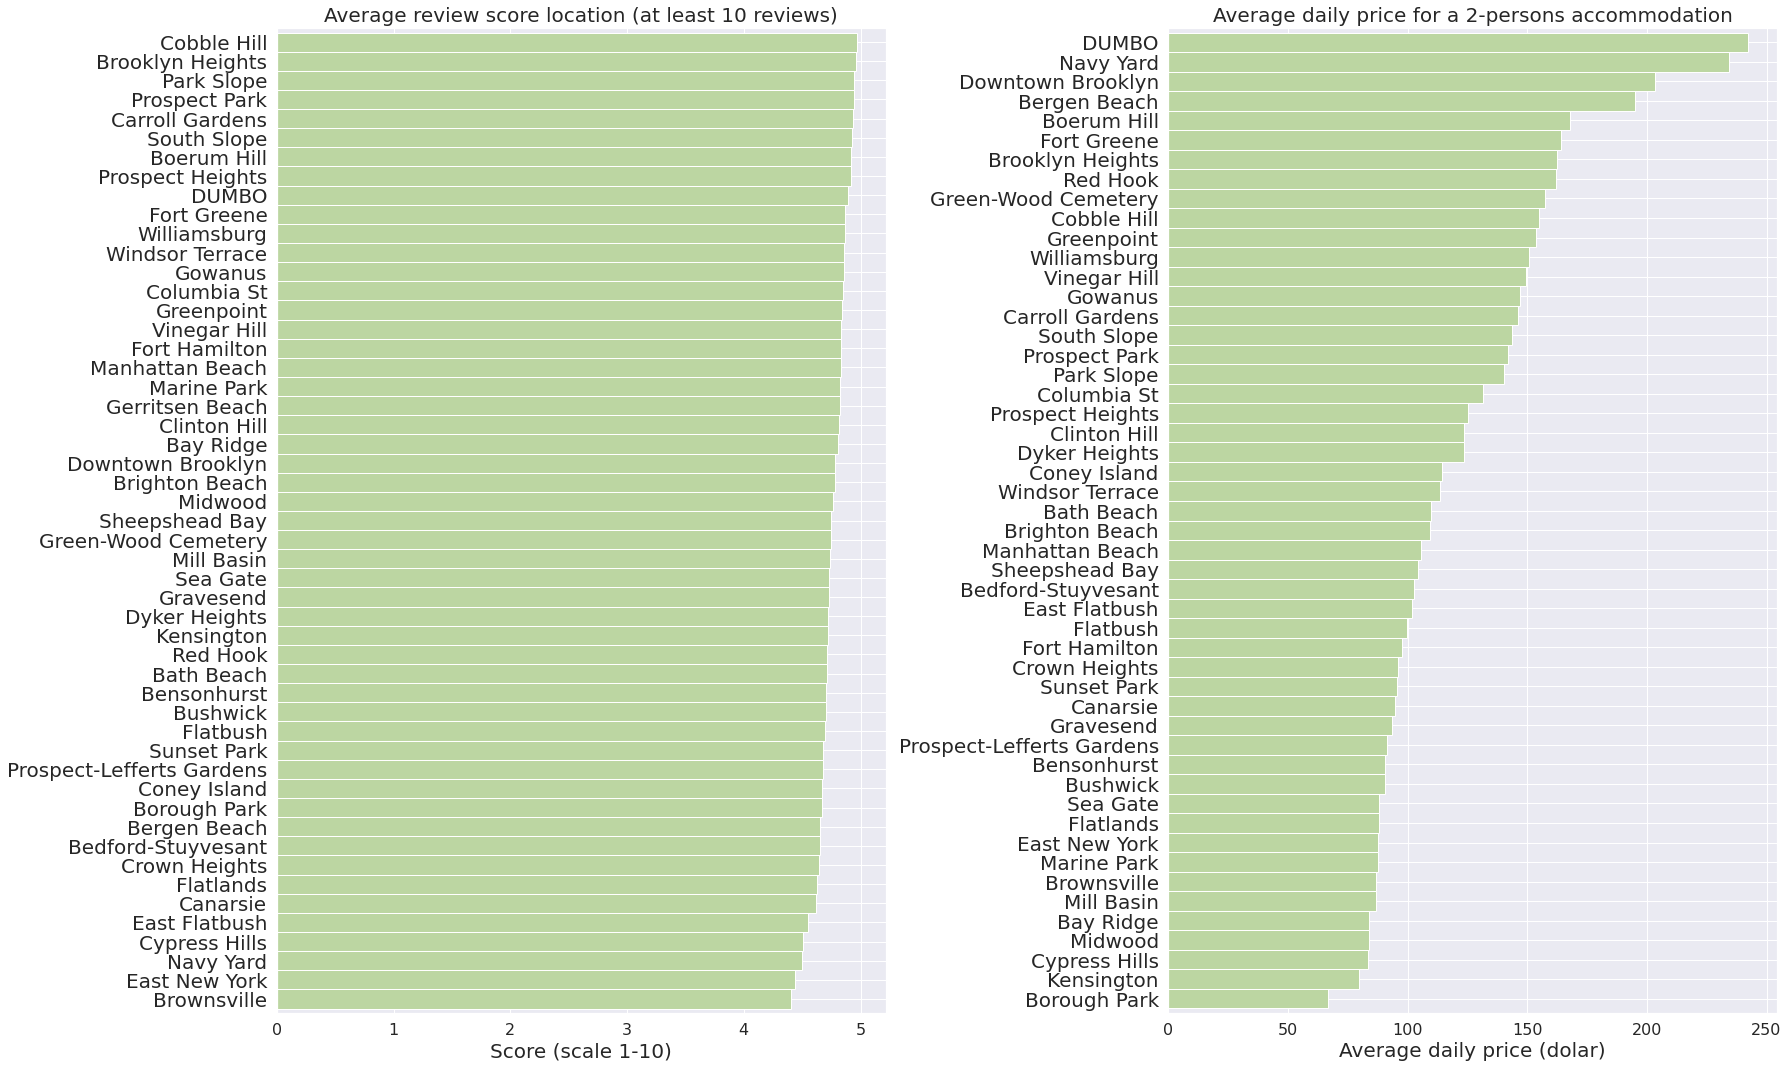

In [42]:
fig = plt.figure(figsize=(25,15))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq = dfB[dfB['number_of_reviews']>=10]
feq1 = feq.groupby('neighbourhood')['review_scores_location'].mean().sort_values(ascending=True)
ax1=feq1.plot.barh(color='#bcd6a2', width=1)
plt.title("Average review score location (at least 10 reviews)", fontsize=20)
plt.xlabel('Score (scale 1-10)', fontsize=20)
plt.ylabel("")

ax2 = fig.add_subplot(122)
feq = dfB[dfB['accommodates']==2]
feq2 = feq.groupby('neighbourhood')['price'].mean().sort_values(ascending=True)
ax2=feq2.plot.barh(color='#bcd6a2', width=1)
plt.title("Average daily price for a 2-persons accommodation", fontsize=20)
plt.xlabel('Average daily price (dolar)', fontsize=20)
plt.ylabel("")

plt.tight_layout()
plt.show()

## 7. Puntuaciones de las reseñas según varios aspectos



*   Ubicación
*   Limpieza
*   Valor
*   Comunicación
*   Llegada
*   Exactitud







MANHATTAN

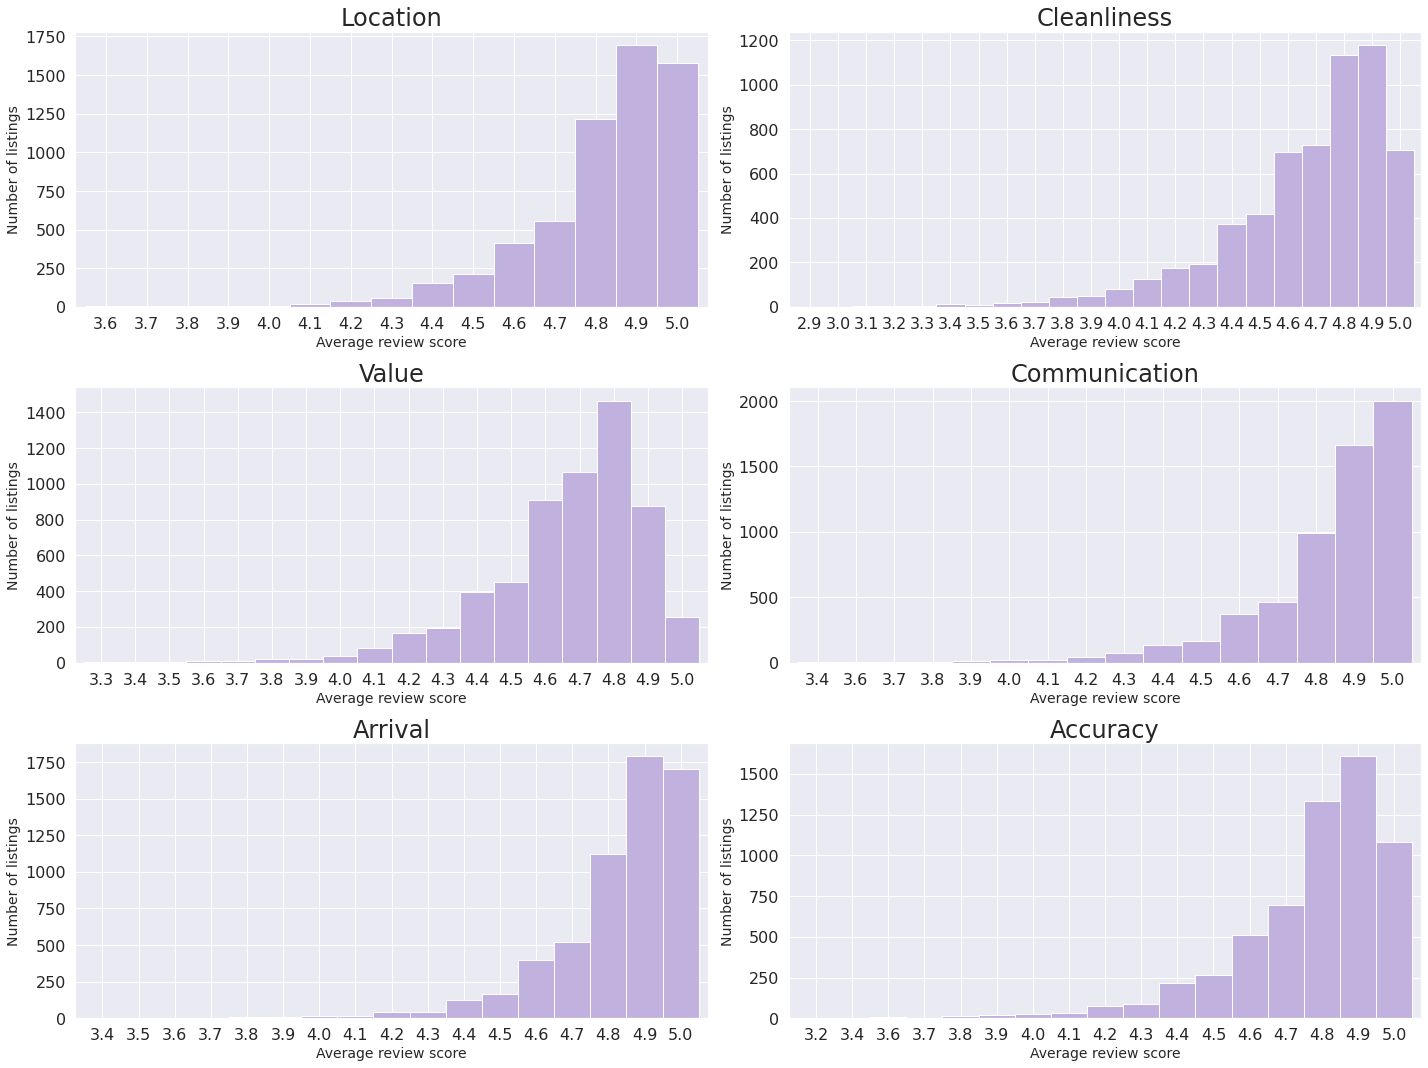

In [43]:
listings10M = dfM[dfM['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10M['review_scores_location'].round(1).value_counts().sort_index()
ax1=feq.plot.bar(color='#c1b1de', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10M['review_scores_cleanliness'].round(1).value_counts().sort_index()
ax2=feq.plot.bar(color='#c1b1de', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10M['review_scores_value'].round(1).value_counts().sort_index()
ax3=feq.plot.bar(color='#c1b1de', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10M['review_scores_communication'].round(1).value_counts().sort_index()
ax4=feq.plot.bar(color='#c1b1de', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10M['review_scores_checkin'].round(1).value_counts().sort_index()
ax5=feq.plot.bar(color='#c1b1de', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10M['review_scores_accuracy'].round(1).value_counts().sort_index()
ax6=feq.plot.bar(color='#c1b1de', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

BROOKLYN

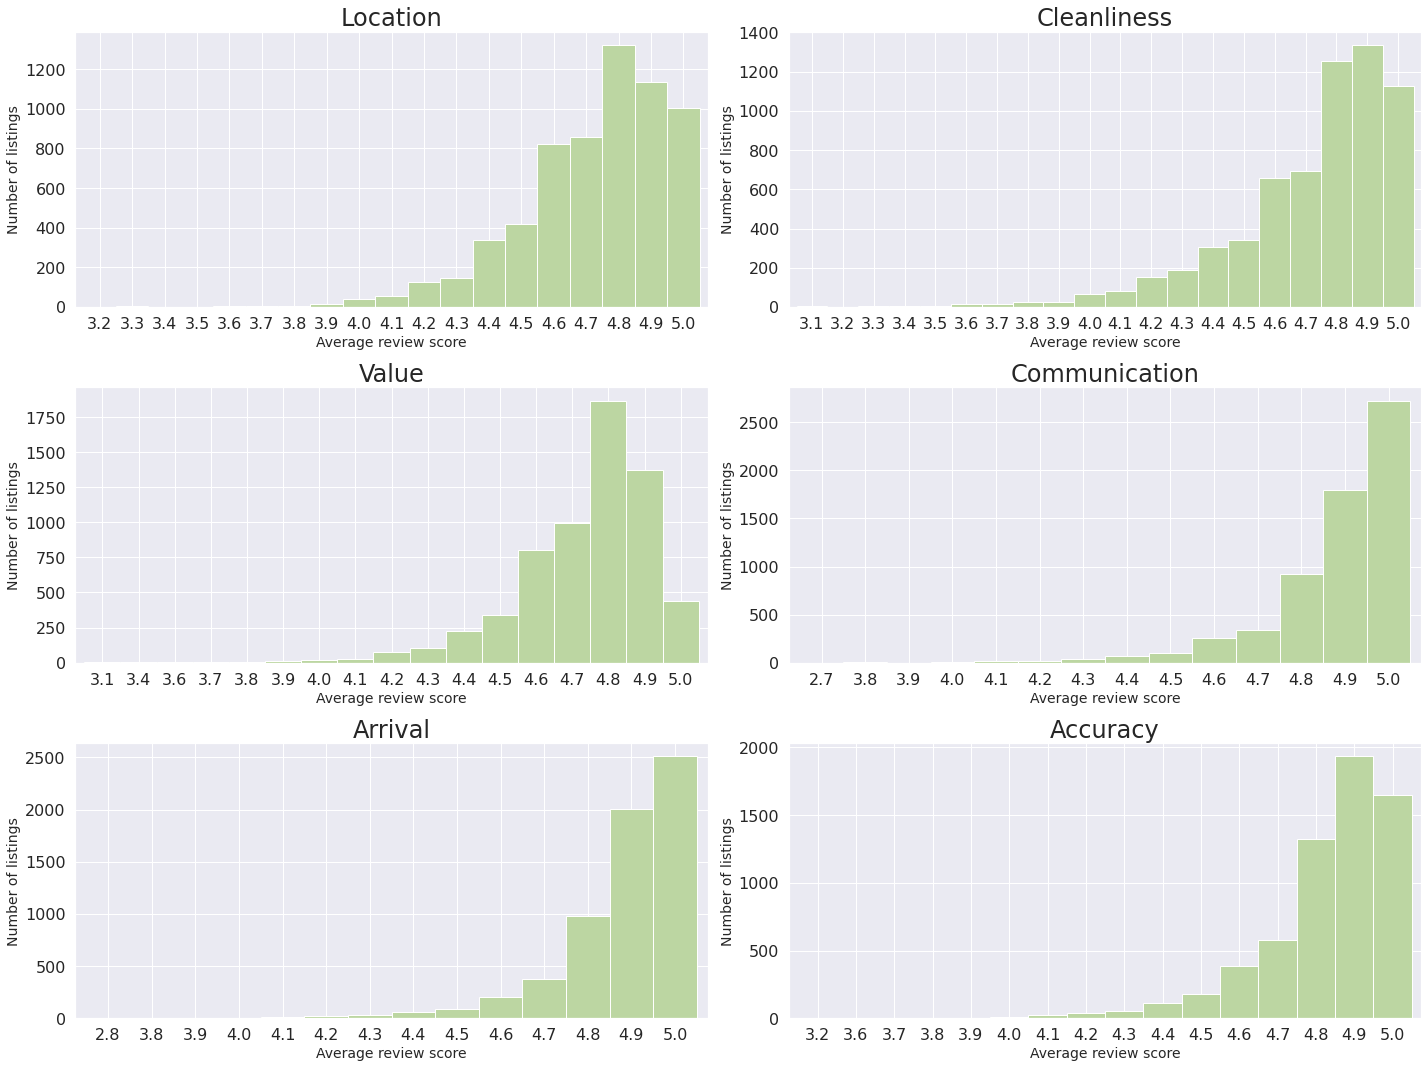

In [44]:
listings10B = dfB[dfB['number_of_reviews']>=10]

fig = plt.figure(figsize=(20,15))
plt.rc('xtick', labelsize=16) 
plt.rc('ytick', labelsize=16)

ax1 = fig.add_subplot(321)
feq=listings10B['review_scores_location'].round(1).value_counts().sort_index()
ax1=feq.plot.bar(color='#bcd6a2', width=1, rot=0)
#ax1.tick_params(axis = 'both', labelsize = 16)
plt.title("Location", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax2 = fig.add_subplot(322)
feq=listings10B['review_scores_cleanliness'].round(1).value_counts().sort_index()
ax2=feq.plot.bar(color='#bcd6a2', width=1, rot=0)
plt.title("Cleanliness", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax3 = fig.add_subplot(323)
feq=listings10B['review_scores_value'].round(1).value_counts().sort_index()
ax3=feq.plot.bar(color='#bcd6a2', width=1, rot=0)
plt.title("Value", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax4 = fig.add_subplot(324)
feq=listings10B['review_scores_communication'].round(1).value_counts().sort_index()
ax4=feq.plot.bar(color='#bcd6a2', width=1, rot=0)
plt.title("Communication", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax5 = fig.add_subplot(325)
feq=listings10B['review_scores_checkin'].round(1).value_counts().sort_index()
ax5=feq.plot.bar(color='#bcd6a2', width=1, rot=0)
plt.title("Arrival", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

ax6 = fig.add_subplot(326)
feq=listings10B['review_scores_accuracy'].round(1).value_counts().sort_index()
ax6=feq.plot.bar(color='#bcd6a2', width=1, rot=0)
plt.title("Accuracy", fontsize=24)
plt.ylabel('Number of listings', fontsize=14)
plt.xlabel('Average review score', fontsize=14)

plt.tight_layout()
plt.show()

## 8. Tips para econtrar un buen hospedador

En Airbnb puedes obtener el estatus de "Superhost" si cumple con los siguientes criterios:
         
* Los Superanfitriones tienen una calificación general promedio de 4.8 o superior según las reseñas de al menos el 50 % de sus huéspedes de Airbnb durante el último año.
* Los Superhosts han alojado al menos 10 estadías en el último año o, si realizan reservas a más largo plazo, 100 noches en al menos 3 estadías.
* Los Superhosts no tienen cancelaciones en el último año, a menos que haya circunstancias atenuantes.
* Los Superhosts responden al 90 % de los mensajes nuevos en 24 horas.





Sin ser un superhost necesariamente, se recomienda elegir a aquellos que respondan a al menos el 90% de los mensajes nuevos

MANHATTAN

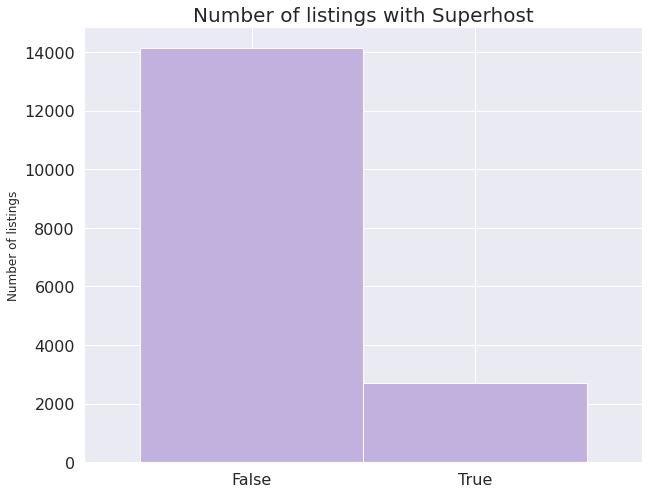

In [45]:
dfM.host_is_superhost = dfM.host_is_superhost.replace({"t": "True", "f": "False"})

feq=dfM['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), color= "#c1b1de", width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

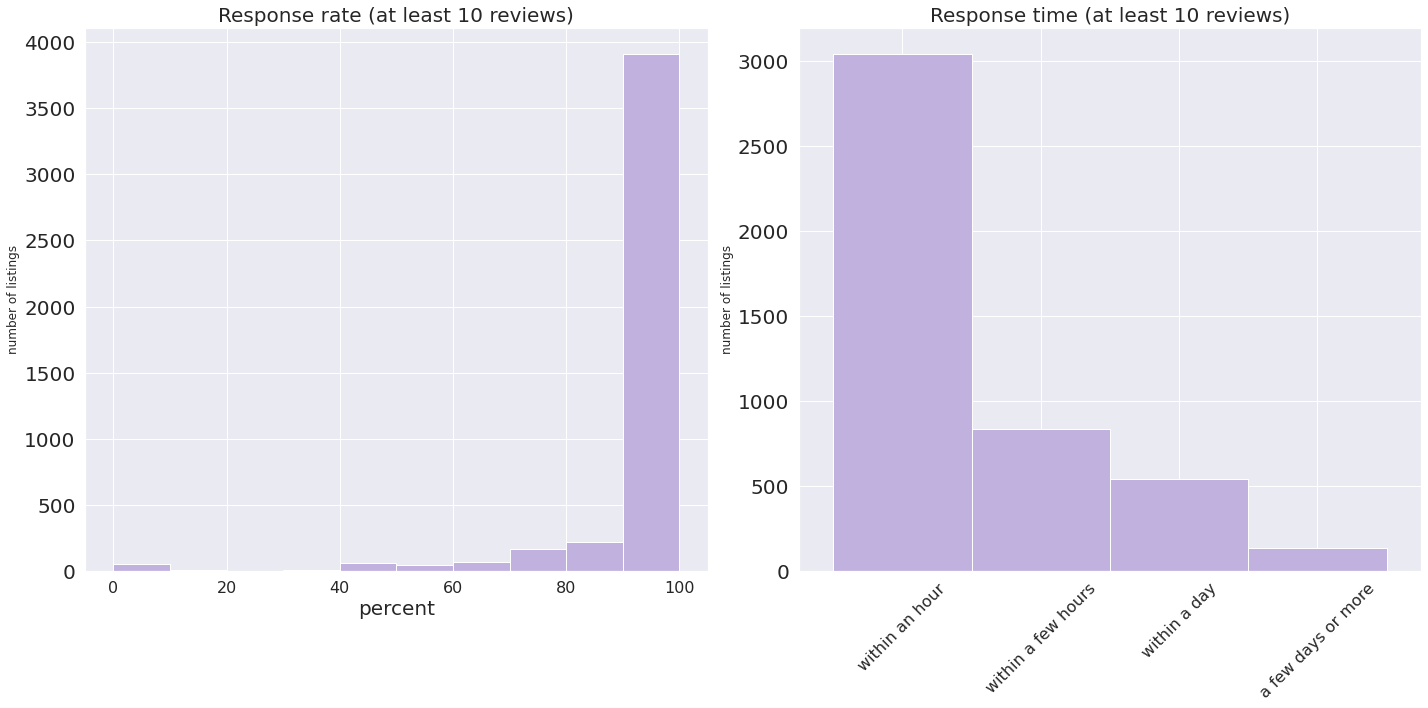

In [47]:
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10M['host_response_rate'].dropna()
ax1= plt.hist(feq1, color= "#c1b1de")
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10M['host_response_time'].value_counts()
ax2=feq2.plot.bar(color='#c1b1de', width=1, rot=45)
plt.title("Response time (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

BROOKLYN

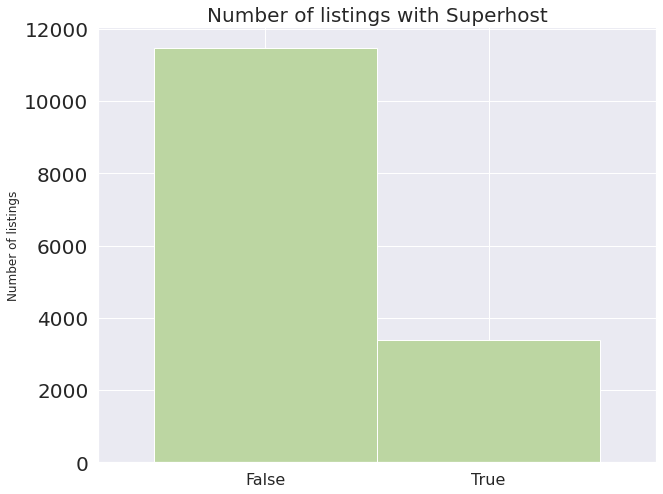

In [48]:
dfB.host_is_superhost = dfB.host_is_superhost.replace({"t": "True", "f": "False"})

feq=dfB['host_is_superhost'].value_counts()
feq.plot.bar(figsize=(10, 8), color = "#bcd6a2", width=1, rot=0)
plt.title("Number of listings with Superhost", fontsize=20)
plt.ylabel('Number of listings', fontsize=12)
plt.show()

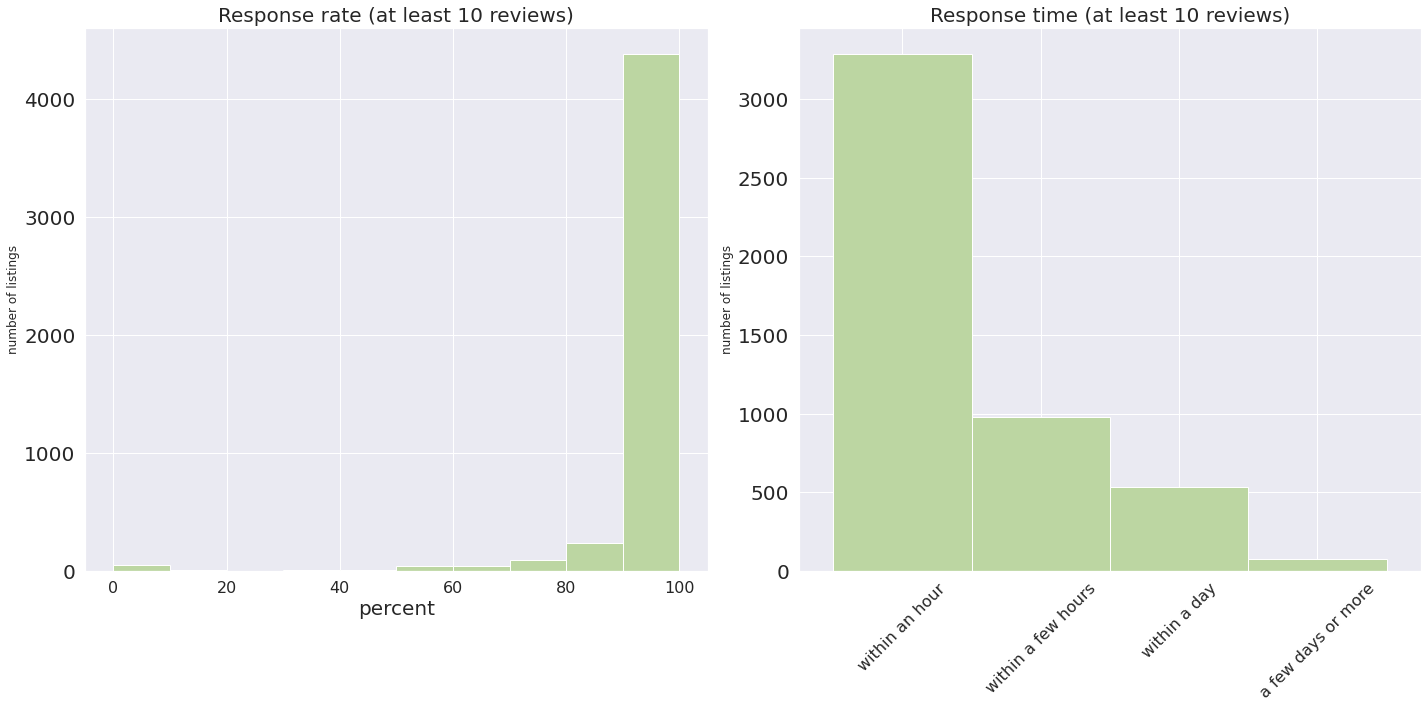

In [49]:
plt.close('all')
fig = plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=20)

ax1 = fig.add_subplot(121)
feq1 = listings10B['host_response_rate'].dropna()
ax1= plt.hist(feq1, color = "#bcd6a2")
plt.title("Response rate (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")
plt.xlabel("percent", fontsize=20)

ax2 = fig.add_subplot(122)
feq2 = listings10B['host_response_time'].value_counts()
ax2=feq2.plot.bar(color="#bcd6a2", width=1, rot=45)
plt.title("Response time (at least 10 reviews)", fontsize=20)
plt.ylabel("number of listings")

plt.tight_layout()
plt.show()

## 9. Disponibilidad en el tiempo (ventana de 1 año)

In [51]:
tar_columns = ["accommodates"]

In [52]:
calendar = pd.merge(calendar, listings[tar_columns], on="listing_id", how='left')

In [53]:
calendar.head(2)

date available    price adjusted_price  minimum_nights  \
listing_id                                                                
2539       2022-09-07         f  $299.00        $299.00            30.0   
2539       2022-09-08         f  $299.00        $299.00            30.0   

            maximum_nights  accommodates  
listing_id                                
2539                 730.0             2  
2539                 730.0             2

In [54]:
calendar["date"].min()

Timestamp('2022-09-07 00:00:00')

In [55]:
calendar.price = calendar.price.str.replace(",","")
calendar['price'] = pd.to_numeric(calendar['price'].str.strip('$'))
calendar = calendar[calendar.date > '2022-09-07']

In [56]:
import plotly.io as pio
pio.renderers.default = "colab"

In [57]:
sum_available = calendar[calendar.available == "t"].groupby(['date']).size().to_frame(name= 'available').reset_index()
sum_available['weekday'] = sum_available['date'].dt.day_name()
sum_available = sum_available.set_index('date')

sum_available.iplot(y='available', mode = 'lines', xTitle = 'Date', yTitle = 'number of listings available',\
                   text='weekday', title = 'Number of listings available by date')

## 10. Precio medio por día

Precio promedio de todos los alojamientos para 2 personas marcados como disponibles por fecha. 
El patrón cíclico se debe a precios más altos en los fines de semana. 
En año nuevo se ve un pico pero pareciera ser menor al mes de septiembre donde comienza a mostrarse los datos

In [65]:
average_price = calendar[(calendar.available == "t") & (calendar.accommodates == 2)].groupby(['date']).mean().astype(np.int64).reset_index()
average_price['weekday'] = average_price['date'].dt.day_name()
average_price = average_price.set_index('date')

average_price.iplot(y='price', mode='lines', xTitle='Date', yTitle='Price',
    text='weekday', title='Average price of available 2 persons accommodation by date')

## 11. Minería de texto con las reseñas

In [66]:
reviews_details = pd.merge(reviews_details, listings[['host_id', 'host_name', 'name']], on = "listing_id", how = "left")
reviews_details = reviews_details[['listing_id', 'name', 'host_id', 'host_name', 'date', 'reviewer_id', 'reviewer_name', 'comments']]
reviews_details.head()

listing_id                                name  host_id host_name  \
0        2539  Clean & quiet apt home by the park     2787      John   
1        2539  Clean & quiet apt home by the park     2787      John   
2        2539  Clean & quiet apt home by the park     2787      John   
3        2539  Clean & quiet apt home by the park     2787      John   
4        2539  Clean & quiet apt home by the park     2787      John   

        date  reviewer_id reviewer_name  \
0 2015-12-04     25160947         Peter   
1 2016-08-27     91513326           Liz   
2 2016-10-01     90022459       Евгений   
3 2017-02-20    116165195        George   
4 2017-03-19    118432644        Carlos   

                                            comments  
0                                        Great host   
1  Nice room for the price. Great neighborhood. J...  
2                     Very nice apt.  New remodeled.  
3  Great place to stay for a while. John is a gre...  
4                                                  .

5 hospedadores con mas reseñas

In [67]:
host_reviews = reviews_details.groupby(['host_id', 'host_name']).size().sort_values(ascending=False).to_frame(name = "number_of_reviews")
host_reviews.head()

number_of_reviews
host_id   host_name                      
158969505 Untitled                   6650
219517861 Sonder (NYC)               4937
371972456 Justin                     4567
397872858 M                          3234
40176101  Brady                      2824

Procesamiento de reseñas

In [68]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [69]:
#take out empty comments (530)
reviews_details = reviews_details[reviews_details['comments'].notnull()]

#remove numbers
reviews_details['comments'] = reviews_details['comments'].str.replace('\d+', '') 
#all to lowercase
reviews_details['comments'] = reviews_details['comments'].str.lower()
#remove windows new line
reviews_details['comments'] = reviews_details['comments'].str.replace('\r\n', "")
#remove stopwords (from nltk library)
stop_english = stopwords.words("english")
reviews_details['comments'] = reviews_details['comments'].apply(lambda x: " ".join([i for i in x.split() 
                                                      if i not in (stop_english)]))
# remove punctuation
reviews_details['comments'] = reviews_details['comments'].str.replace('[^\w\s]'," ")
# replace x spaces by one space
reviews_details['comments'] = reviews_details['comments'].str.replace('\s+', ' ')

reviews_details.comments.values[2] #print same comments again

'nice apt new remodeled '

Hacemos conteo de palabras y creamos un *wordcloud*

In [70]:
texts = reviews_details.comments.tolist()  #solo hay que cambiar el reviews_details segun nuestro archivo. el resto va igual siempre

vec = CountVectorizer().fit(texts)
bag_of_words = vec.transform(texts)
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

cvec_df = pd.DataFrame.from_records(words_freq, columns= ['words', 'counts']).sort_values(by="counts", ascending=False)
cvec_df.head(10)

words  counts
0        great  588687
38          br  545377
16       place  530336
17        stay  470064
84       clean  318061
246  apartment  308119
202   location  301506
1         host  254917
2         nice  223098
249      would  218109

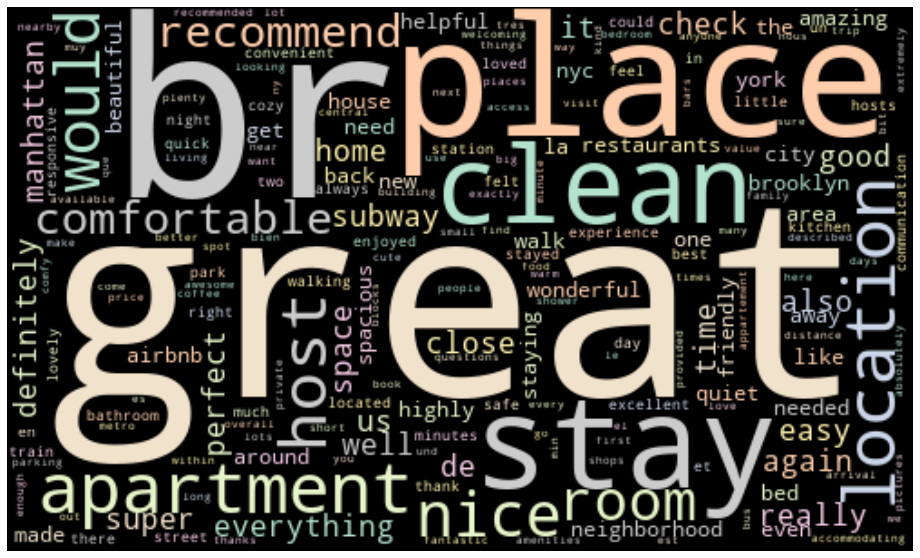

In [75]:
from seaborn.widgets import color_palette
cvec_dict = dict(zip(cvec_df.words, cvec_df.counts))

wordcloud = WordCloud(width=500, height=300, colormap="Pastel2_r")

wordcloud.generate_from_frequencies(frequencies=cvec_dict)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()